<a href="https://colab.research.google.com/github/starlingomez/preworkmac/blob/master/5_de_diciembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pj Washintong

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 51.7829 - mae: 6.5584 - val_loss: 44.9871 - val_mae: 6.0122 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.1699 - mae: 5.6150 - val_loss: 32.3923 - val_mae: 5.0095 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.5308 - mae: 4.5403 - val_loss: 19.9913 - val_mae: 3.8426 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.2605 - mae: 3.5358 - val_loss: 11.5772 - val_mae: 2.8596 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.7582 - mae: 3.0154 - val_loss: 8.4323 - val_mae: 2.4467 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2679 - mae: 2.9018 - val_loss: 7.6003 - val_mae: 2.3311 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0299 - mae: 2.7808 - val_loss: 7.5966 - val_mae: 2.3332 - learning_rate: 0.0010
Epoch 8/100
23

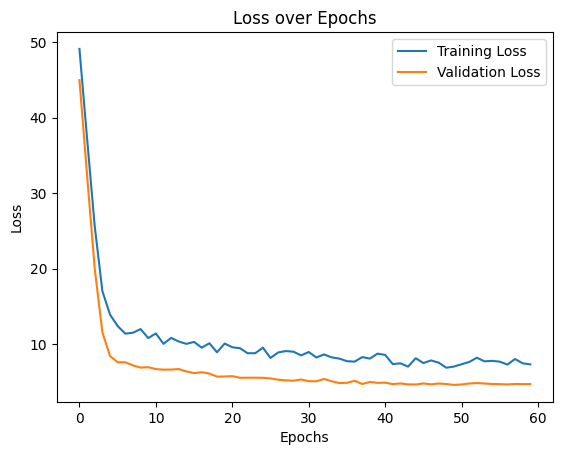

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted total rebounds for the player's next game: 7.82


7.8158984

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [8.4],
    'avg_min_last5': [36.8],
    'opp_avg_reb_allowed': [45.4],
    'player_avg_reb_vs_opp': [7.3],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#kyrie Irving

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 51.4602 - mae: 6.5060 - val_loss: 43.6253 - val_mae: 5.8486 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36.0755 - mae: 5.2538 - val_loss: 29.4657 - val_mae: 4.6902 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.4612 - mae: 4.0891 - val_loss: 16.7322 - val_mae: 3.4461 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4205 - mae: 3.3944 - val_loss: 10.1327 - val_mae: 2.6299 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.6377 - mae: 2.8882 - val_loss: 8.5885 - val_mae: 2.4460 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5435 - mae: 2.7414 - val_loss: 7.8572 - val_mae: 2.3517 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0101 - mae: 2.7868 - val_loss: 8.4528 - val_mae: 2.4550 - learning_rate: 0.0010
Epoch 8/100


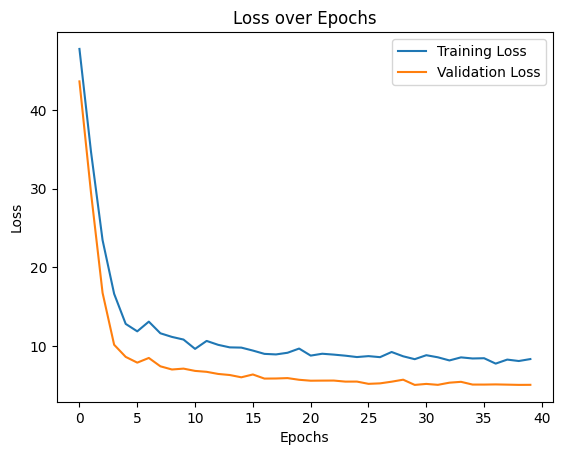

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted total rebounds for the player's next game: 6.44


6.4399414

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.8],
    'avg_min_last5': [36.9],
    'opp_avg_reb_allowed': [45.4],
    'player_avg_reb_vs_opp': [7],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#coulibaly

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 51.6022 - mae: 6.4744 - val_loss: 43.6063 - val_mae: 5.8548 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.6084 - mae: 5.2184 - val_loss: 27.4288 - val_mae: 4.5002 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.9629 - mae: 3.8670 - val_loss: 14.5606 - val_mae: 3.2118 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.3777 - mae: 3.0189 - val_loss: 9.2309 - val_mae: 2.4840 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1666 - mae: 2.9368 - val_loss: 8.1132 - val_mae: 2.3428 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9621 - mae: 2.5315 - val_loss: 7.3366 - val_mae: 2.2323 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.6547 - mae: 2.7437 - val_loss: 7.2565 - val_mae: 2.2359 - learning_rate: 0.0010
Epoch 8/100
23/

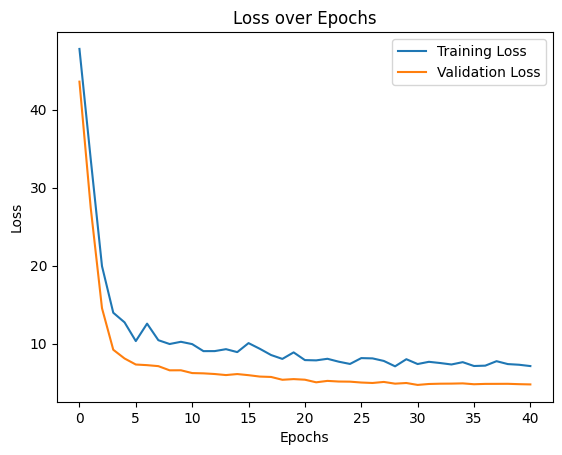

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted total rebounds for the player's next game: 6.19


6.1864896

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [4.4],
    'avg_min_last5': [34.6],
    'opp_avg_reb_allowed': [41.3],
    'player_avg_reb_vs_opp': [7.5],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#jonas valanciunas

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 56.7298 - mae: 6.9470 - val_loss: 51.1252 - val_mae: 6.4728 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.2760 - mae: 6.2048 - val_loss: 38.3041 - val_mae: 5.4710 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.9432 - mae: 4.6645 - val_loss: 21.9677 - val_mae: 4.0328 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.6592 - mae: 3.6239 - val_loss: 10.2029 - val_mae: 2.6428 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.5926 - mae: 2.9477 - val_loss: 7.0183 - val_mae: 2.2003 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4654 - mae: 2.7138 - val_loss: 6.6173 - val_mae: 2.1293 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8312 - mae: 2.6068 - val_loss: 6.8309 - val_mae: 2.1747 - learning_rate: 0.0010
Epoch 8/100
23

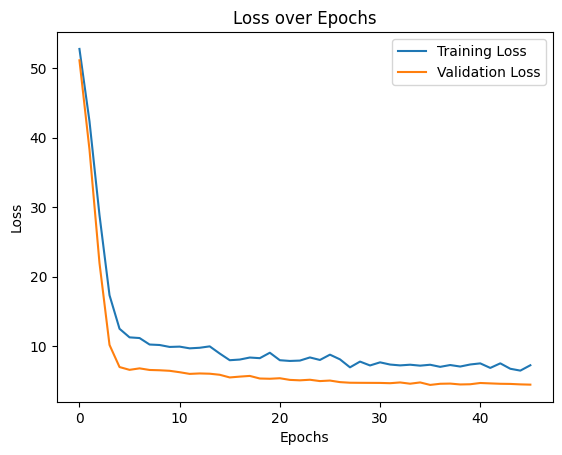

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted total rebounds for the player's next game: 6.65


6.654279

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [7.2],
    'avg_min_last5': [19.6],
    'opp_avg_reb_allowed': [41.3],
    'player_avg_reb_vs_opp': [7.8],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#evan mobley

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 58.9137 - mae: 7.0702 - val_loss: 50.0964 - val_mae: 6.3692 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.8439 - mae: 6.2291 - val_loss: 37.9434 - val_mae: 5.4367 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.1144 - mae: 4.8936 - val_loss: 24.1895 - val_mae: 4.2381 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.4850 - mae: 3.9540 - val_loss: 13.4238 - val_mae: 3.1233 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.4887 - mae: 3.0771 - val_loss: 8.6261 - val_mae: 2.4623 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8899 - mae: 2.8486 - val_loss: 7.3288 - val_mae: 2.2820 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3648 - mae: 2.8657 - val_loss: 7.3440 - val_mae: 2.2897 - learning_rate: 0.0010
Epoch 8/100
2

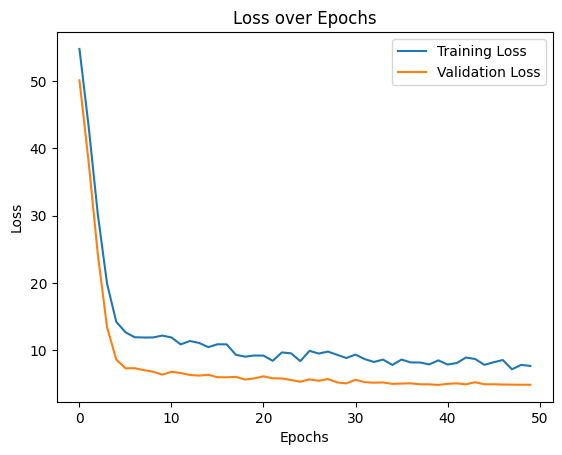

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted total rebounds for the player's next game: 8.83


8.83271

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [11],
    'avg_min_last5': [34.5],
    'opp_avg_reb_allowed': [45.4],
    'player_avg_reb_vs_opp': [7],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#m. porter

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 52.5597 - mae: 6.5817 - val_loss: 45.6836 - val_mae: 6.0859 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.2227 - mae: 5.5608 - val_loss: 30.4895 - val_mae: 4.8729 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.9516 - mae: 4.2620 - val_loss: 15.5774 - val_mae: 3.3657 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.8702 - mae: 3.2148 - val_loss: 8.8914 - val_mae: 2.4001 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.0935 - mae: 2.7646 - val_loss: 7.5078 - val_mae: 2.2138 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.3760 - mae: 2.7204 - val_loss: 7.5275 - val_mae: 2.2439 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.2024 - mae: 2.6512 - val_loss: 7.3923 - val_mae: 2.2378 - learning_rate: 0.0010
Epoch 8/100
23

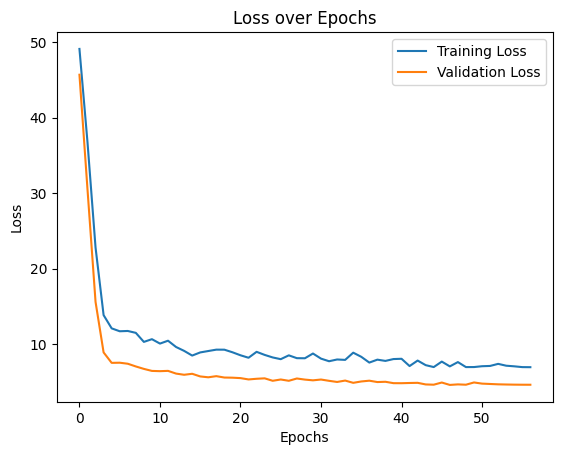

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted total rebounds for the player's next game: 6.98


6.9836373

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [8.4],
    'avg_min_last5': [32.8],
    'opp_avg_reb_allowed': [46],
    'player_avg_reb_vs_opp': [6],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


# r braun

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 48.6125 - mae: 6.2716 - val_loss: 43.1669 - val_mae: 5.8696 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.0403 - mae: 5.2024 - val_loss: 27.1264 - val_mae: 4.5455 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.0831 - mae: 3.7158 - val_loss: 13.0775 - val_mae: 3.0487 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1205 - mae: 2.9003 - val_loss: 8.5199 - val_mae: 2.4676 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9867 - mae: 2.6996 - val_loss: 8.0386 - val_mae: 2.4034 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.0841 - mae: 2.6789 - val_loss: 7.6673 - val_mae: 2.3348 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.2171 - mae: 2.5751 - val_loss: 7.6233 - val_mae: 2.3241 - learning_rate: 0.0010
Ep

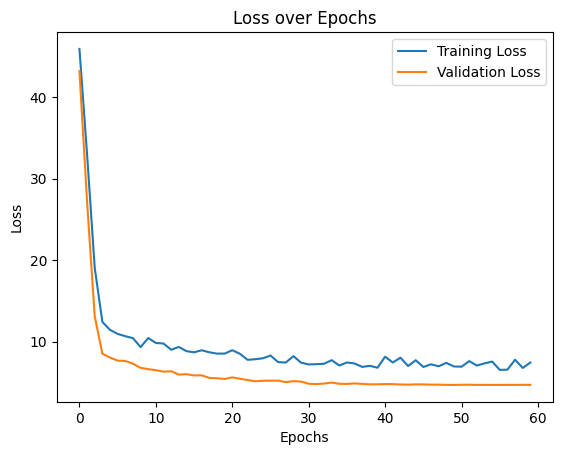

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted total rebounds for the player's next game: 5.44


5.4397206

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [4.6],
    'avg_min_last5': [35.3],
    'opp_avg_reb_allowed': [46],
    'player_avg_reb_vs_opp': [4],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 53.3659 - mae: 6.6622 - val_loss: 48.3229 - val_mae: 6.2008 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 43.9493 - mae: 5.8225 - val_loss: 36.2964 - val_mae: 5.2737 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.5368 - mae: 4.9208 - val_loss: 22.2905 - val_mae: 4.0426 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.6203 - mae: 3.5551 - val_loss: 11.6982 - val_mae: 2.8418 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.9687 - mae: 3.0401 - val_loss: 8.1485 - val_mae: 2.3198 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.0419 - mae: 2.5237 - val_loss: 7.4122 - val_mae: 2.2269 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5525 - mae: 2.6869 - val_loss: 7.0869 - val_mae: 2.1977 - learning_rate: 0.0010
E

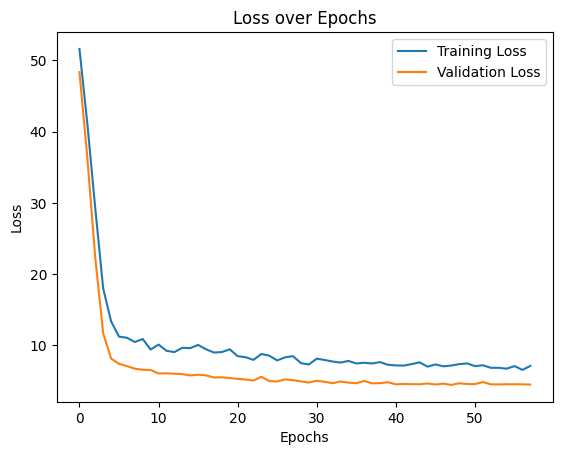

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted total rebounds for the player's next game: 5.47


5.470554

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [4.8],
    'avg_min_last5': [34.6],
    'opp_avg_reb_allowed': [46],
    'player_avg_reb_vs_opp': [4],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#scottie barnes

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 53.7232 - mae: 6.6875 - val_loss: 42.7476 - val_mae: 5.8746 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.8827 - mae: 5.1445 - val_loss: 25.8733 - val_mae: 4.4477 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.0223 - mae: 4.0104 - val_loss: 12.6260 - val_mae: 2.9621 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0988 - mae: 2.9122 - val_loss: 8.7238 - val_mae: 2.4672 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7692 - mae: 2.7430 - val_loss: 8.0608 - val_mae: 2.3614 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.2027 - mae: 2.5929 - val_loss: 7.7146 - val_mae: 2.3048 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9279 - mae: 2.6315 - val_loss: 7.7099 - val_mae: 2.3114 - learning_rate: 0.0010
Epoch 8/100
23

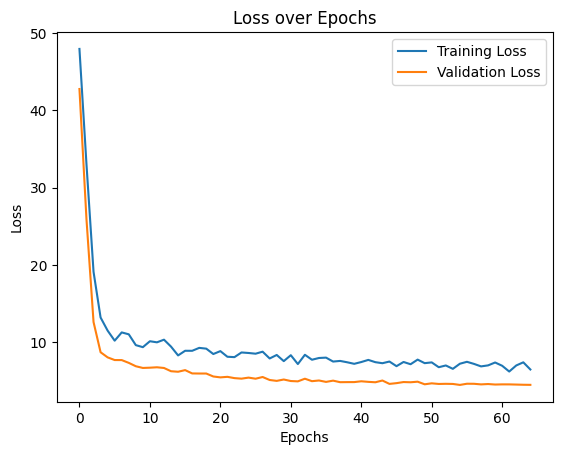

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted total rebounds for the player's next game: 8.61


8.611301

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [10.4],
    'avg_min_last5': [35.6],
    'opp_avg_reb_allowed': [47.8],
    'player_avg_reb_vs_opp': [7],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#jalen williams

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 58.3700 - mae: 6.9753 - val_loss: 50.7398 - val_mae: 6.4335 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.2146 - mae: 6.0777 - val_loss: 37.5542 - val_mae: 5.4312 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.6554 - mae: 4.8430 - val_loss: 22.1712 - val_mae: 4.0859 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.7296 - mae: 3.6326 - val_loss: 11.2293 - val_mae: 2.8400 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 12.5758 - mae: 2.8361 - val_loss: 7.8109 - val_mae: 2.3613 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.1656 - mae: 2.6261 - val_loss: 7.2667 - val_mae: 2.2751 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.3431 - mae: 2.6970 - val_loss: 7.0230 - val_mae: 2.2377 - learning_rate: 0.0010
Epoch 8/100


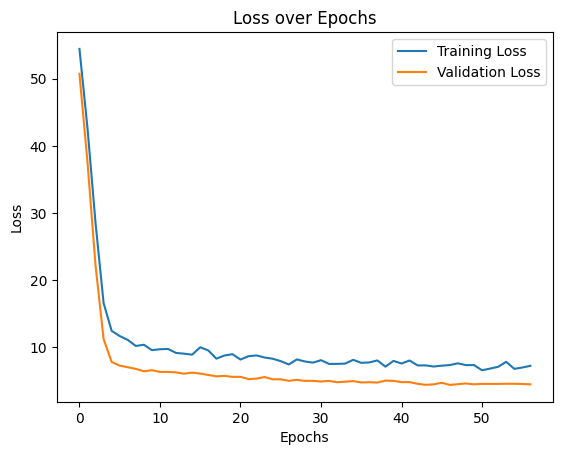

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted total rebounds for the player's next game: 6.20


6.1964674

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [4.2],
    'avg_min_last5': [29.4],
    'opp_avg_reb_allowed': [41.6],
    'player_avg_reb_vs_opp': [3],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#karl town

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 51.8432 - mae: 6.4747 - val_loss: 43.4211 - val_mae: 5.8602 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.8691 - mae: 5.2971 - val_loss: 27.8081 - val_mae: 4.5613 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.1684 - mae: 4.1217 - val_loss: 14.1366 - val_mae: 3.2097 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.8695 - mae: 2.9307 - val_loss: 8.2141 - val_mae: 2.3452 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.3259 - mae: 2.7857 - val_loss: 6.7274 - val_mae: 2.1011 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.7140 - mae: 2.6225 - val_loss: 6.6206 - val_mae: 2.1116 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9193 - mae: 2.5783 - val_loss: 6.3213 - val_mae: 2.0808 - learning_rate: 0.0010
Epoch 8/100
23/

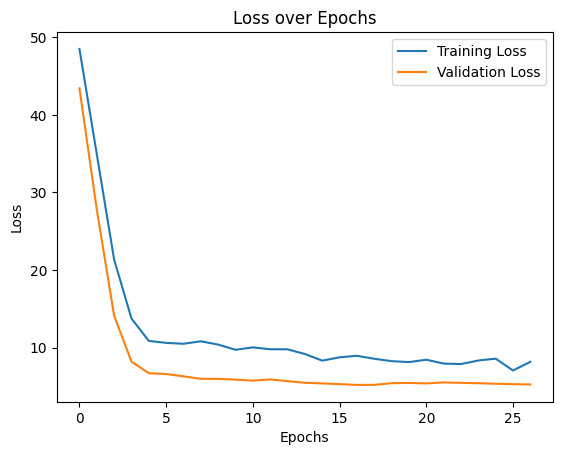

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted total rebounds for the player's next game: 13.94


13.937459

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [15],
    'avg_min_last5': [33.7],
    'opp_avg_reb_allowed': [43.8],
    'player_avg_reb_vs_opp': [12],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#josh hart

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 57.3995 - mae: 6.9273 - val_loss: 49.3188 - val_mae: 6.2897 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.9756 - mae: 5.8631 - val_loss: 35.3347 - val_mae: 5.2078 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.3884 - mae: 4.7225 - val_loss: 20.6282 - val_mae: 3.8563 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.0811 - mae: 3.6301 - val_loss: 10.9847 - val_mae: 2.6933 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.0215 - mae: 2.9389 - val_loss: 8.4083 - val_mae: 2.3486 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.6018 - mae: 2.8685 - val_loss: 7.6046 - val_mae: 2.2326 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0688 - mae: 2.6891 - val_loss: 7.6026 - val_mae: 2.2400 - learning_rate: 0.0010


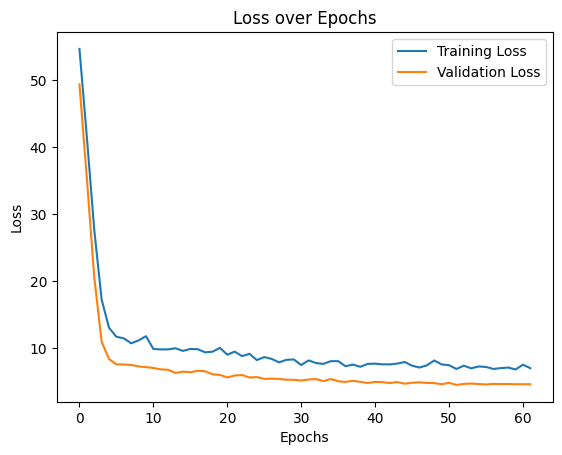

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted total rebounds for the player's next game: 9.21


9.206401

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [7.8],
    'avg_min_last5': [36.1],
    'opp_avg_reb_allowed': [43.8],
    'player_avg_reb_vs_opp': [12],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#josh green

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 52.2012 - mae: 6.5752 - val_loss: 44.6011 - val_mae: 5.9822 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.8666 - mae: 5.6094 - val_loss: 28.8849 - val_mae: 4.6937 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.3261 - mae: 4.0865 - val_loss: 14.5586 - val_mae: 3.2327 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6949 - mae: 2.9263 - val_loss: 8.4160 - val_mae: 2.4274 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1943 - mae: 2.6540 - val_loss: 7.5125 - val_mae: 2.3001 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5521 - mae: 2.6452 - val_loss: 7.7086 - val_mae: 2.3381 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4621 - mae: 2.5880 - val_loss: 7.3390 - val_mae: 2.2892 - learning_rate: 0.0010
Epoch 8/100
2

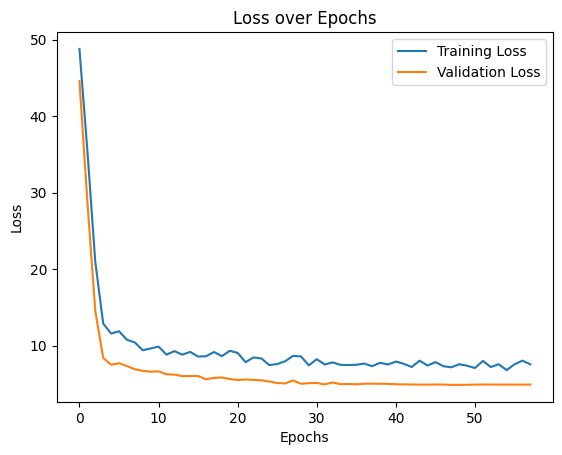

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted total rebounds for the player's next game: 6.29


6.2920322

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [2.6],
    'avg_min_last5': [32],
    'opp_avg_reb_allowed': [39.4],
    'player_avg_reb_vs_opp': [1],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#sabonis

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 58.4204 - mae: 6.9881 - val_loss: 50.8378 - val_mae: 6.4387 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.0807 - mae: 6.1589 - val_loss: 37.9795 - val_mae: 5.4531 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.8875 - mae: 5.0746 - val_loss: 23.4995 - val_mae: 4.2010 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.8445 - mae: 3.9396 - val_loss: 12.5205 - val_mae: 2.9949 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.3367 - mae: 2.9348 - val_loss: 8.2983 - val_mae: 2.4000 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0613 - mae: 2.7750 - val_loss: 7.6423 - val_mae: 2.3145 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1216 - mae: 2.6797 - val_loss: 8.1370 - val_mae: 2.4073 - learning_rate: 0.0010
Epoch 8/100
2

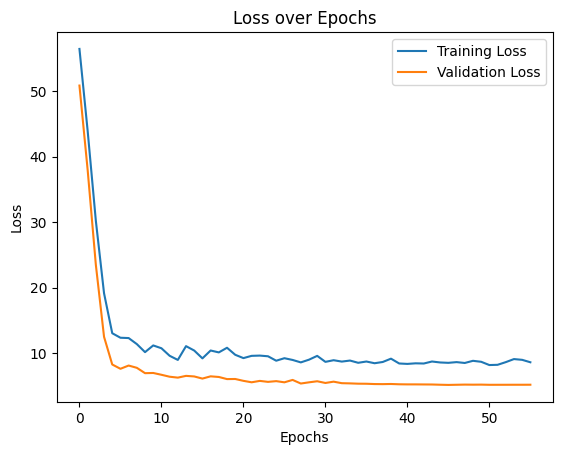

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted total rebounds for the player's next game: 14.86


14.855523

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [11.2],
    'avg_min_last5': [35.6],
    'opp_avg_reb_allowed': [44.6],
    'player_avg_reb_vs_opp': [21.7],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#jarren jackson

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 51.7543 - mae: 6.4852 - val_loss: 47.1192 - val_mae: 6.1360 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.8455 - mae: 5.7331 - val_loss: 34.1519 - val_mae: 5.0933 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.2362 - mae: 4.4644 - val_loss: 19.1969 - val_mae: 3.7194 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.2698 - mae: 3.3816 - val_loss: 10.1626 - val_mae: 2.6377 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.5635 - mae: 2.9833 - val_loss: 7.8328 - val_mae: 2.3200 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.3695 - mae: 2.7582 - val_loss: 7.4882 - val_mae: 2.2685 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.6105 - mae: 2.6128 - val_loss: 7.1016 - val_mae: 2.2190 - learning_rate: 0.0010
E

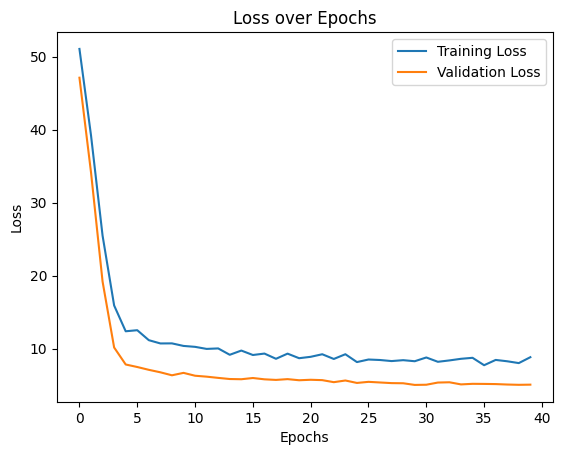

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted total rebounds for the player's next game: 6.26


6.2640224

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [7],
    'avg_min_last5': [27.5],
    'opp_avg_reb_allowed': [40.4],
    'player_avg_reb_vs_opp': [2.7],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#jabari smith

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 49.7182 - mae: 6.3445 - val_loss: 43.6305 - val_mae: 5.9118 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.3110 - mae: 5.3864 - val_loss: 28.2225 - val_mae: 4.6293 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.3687 - mae: 3.9863 - val_loss: 14.3723 - val_mae: 3.2127 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.7015 - mae: 3.1465 - val_loss: 8.8580 - val_mae: 2.4230 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.9181 - mae: 2.8657 - val_loss: 7.7529 - val_mae: 2.2933 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2724 - mae: 2.8194 - val_loss: 7.5762 - val_mae: 2.2845 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1244 - mae: 2.5614 - val_loss: 7.4296 - val_mae: 2.2769 - learning_rate: 0.0010
Epoch 8/100
23

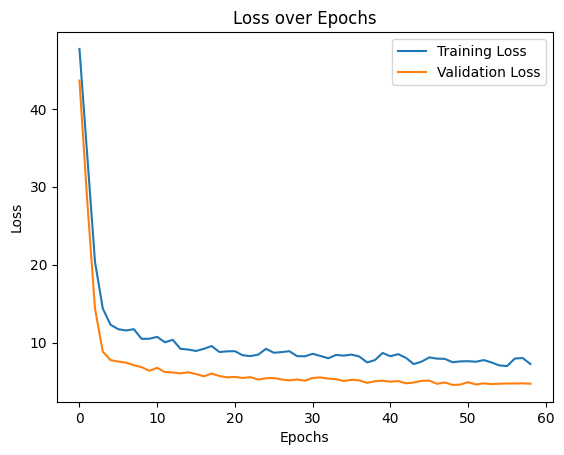

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted total rebounds for the player's next game: 7.16


7.160416

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [7.8],
    'avg_min_last5': [35.4],
    'opp_avg_reb_allowed': [46.7],
    'player_avg_reb_vs_opp': [7],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#fred vanvlet

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 58.9804 - mae: 7.0164 - val_loss: 54.5873 - val_mae: 6.6932 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.4017 - mae: 6.4191 - val_loss: 46.3527 - val_mae: 6.0904 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.2593 - mae: 5.5192 - val_loss: 34.8260 - val_mae: 5.1854 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.7870 - mae: 4.7399 - val_loss: 21.2238 - val_mae: 3.9495 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.4980 - mae: 3.5787 - val_loss: 11.8025 - val_mae: 2.8636 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.5165 - mae: 2.8484 - val_loss: 8.4107 - val_mae: 2.3642 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1706 - mae: 2.8549 - val_loss: 7.2601 - val_mae: 2.1893 - learning_rate: 0.0010
Epoch 8/100


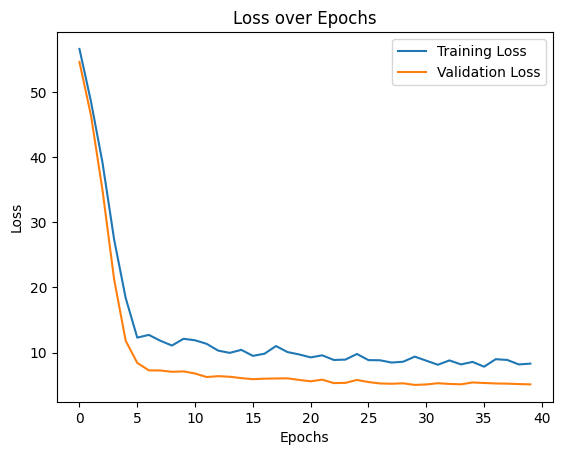

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted total rebounds for the player's next game: 5.43


5.430889

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [4],
    'avg_min_last5': [37.3],
    'opp_avg_reb_allowed': [46.7],
    'player_avg_reb_vs_opp': [2],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#brandin Pozdimieski

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 58.6194 - mae: 6.9573 - val_loss: 53.0533 - val_mae: 6.5583 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 44.9340 - mae: 5.9715 - val_loss: 41.4332 - val_mae: 5.7184 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.5358 - mae: 5.1348 - val_loss: 24.9306 - val_mae: 4.3224 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 21.7267 - mae: 3.8549 - val_loss: 11.1869 - val_mae: 2.7929 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 14.0248 - mae: 2.9979 - val_loss: 7.1888 - val_mae: 2.2152 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 10.9675 - mae: 2.6489 - val_loss: 6.9551 - val_mae: 2.1763 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.2544 - mae: 2.5779 - val_loss: 7.2177 - val_mae: 2.2386 - learning_rate: 0.00

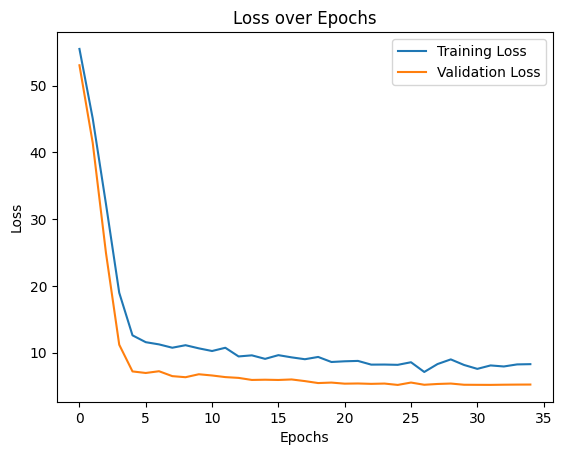

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted total rebounds for the player's next game: 4.57


4.565098

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [4.6],
    'avg_min_last5': [25.1],
    'opp_avg_reb_allowed': [44.9],
    'player_avg_reb_vs_opp': [5],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#trey murphy

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 49.1464 - mae: 6.3038 - val_loss: 44.8898 - val_mae: 5.9964 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.0471 - mae: 5.4187 - val_loss: 28.9104 - val_mae: 4.6964 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.1178 - mae: 4.0900 - val_loss: 14.1681 - val_mae: 3.2007 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.6234 - mae: 2.8170 - val_loss: 8.7352 - val_mae: 2.4966 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5711 - mae: 2.6975 - val_loss: 7.5286 - val_mae: 2.3211 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5341 - mae: 2.7108 - val_loss: 7.0890 - val_mae: 2.2513 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8863 - mae: 2.6313 - val_loss: 7.1157 - val_mae: 2.2662 - learning_rate: 0.0010
Epoch 8/100
23

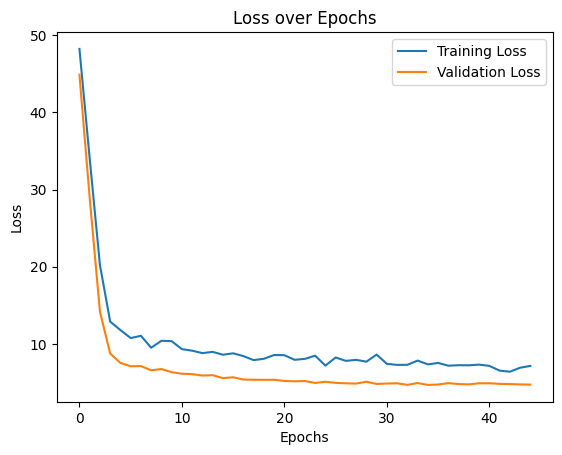

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted total rebounds for the player's next game: 5.58


5.5817857

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [5],
    'avg_min_last5': [35.9],
    'opp_avg_reb_allowed': [42.2],
    'player_avg_reb_vs_opp': [4],
    'home_indicator': [1],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#nikola vucevic

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 53.8312 - mae: 6.6740 - val_loss: 46.3724 - val_mae: 6.0686 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.2612 - mae: 5.4719 - val_loss: 31.1778 - val_mae: 4.8551 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.9006 - mae: 4.2164 - val_loss: 16.6852 - val_mae: 3.4381 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.0345 - mae: 3.1548 - val_loss: 9.2857 - val_mae: 2.4848 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.8007 - mae: 2.8591 - val_loss: 7.8235 - val_mae: 2.2971 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3177 - mae: 2.6602 - val_loss: 7.6409 - val_mae: 2.2932 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8946 - mae: 2.8214 - val_loss: 7.4822 - val_mae: 2.2750 - learning_rate: 0.0010
Epoch 8/100
23/

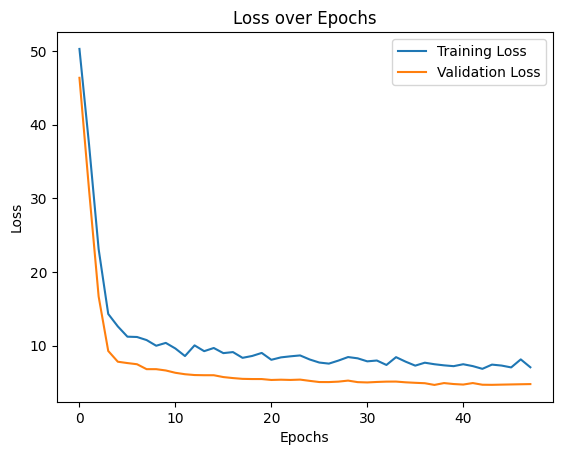

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted total rebounds for the player's next game: 10.52


10.522062

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [10.4],
    'avg_min_last5': [29.8],
    'opp_avg_reb_allowed': [46.2],
    'player_avg_reb_vs_opp': [12.3],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#josh gidey

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 54.8285 - mae: 6.7422 - val_loss: 45.3438 - val_mae: 6.0455 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.2655 - mae: 5.6917 - val_loss: 30.0393 - val_mae: 4.8115 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.1717 - mae: 4.2189 - val_loss: 15.9274 - val_mae: 3.4406 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.0808 - mae: 3.0890 - val_loss: 9.1280 - val_mae: 2.5446 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0179 - mae: 2.7681 - val_loss: 7.7388 - val_mae: 2.3494 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8912 - mae: 2.7708 - val_loss: 7.3880 - val_mae: 2.3021 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.9943 - mae: 2.7983 - val_loss: 7.6186 - val_mae: 2.3525 - learning_rate: 0.0010
Ep

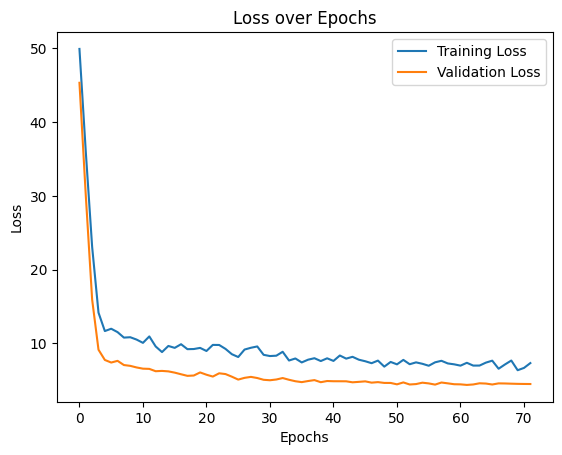

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted total rebounds for the player's next game: 6.33


6.327602

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.8],
    'avg_min_last5': [25.3],
    'opp_avg_reb_allowed': [46.2],
    'player_avg_reb_vs_opp': [7.3],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 48.0364 - mae: 6.3565 - val_loss: 42.5702 - val_mae: 5.8561 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 36.1089 - mae: 5.2266 - val_loss: 27.8435 - val_mae: 4.6205 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 22.2752 - mae: 3.9300 - val_loss: 15.2606 - val_mae: 3.3016 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.8671 - mae: 3.3100 - val_loss: 10.0674 - val_mae: 2.6629 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.2899 - mae: 2.8769 - val_loss: 8.6369 - val_mae: 2.4998 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.7537 - mae: 2.8804 - val_loss: 8.3722 - val_mae: 2.4665 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 12.4790 - mae: 2.7920 - val_loss: 8.2403 - val_mae: 2.4477 - learning_rate: 0.0

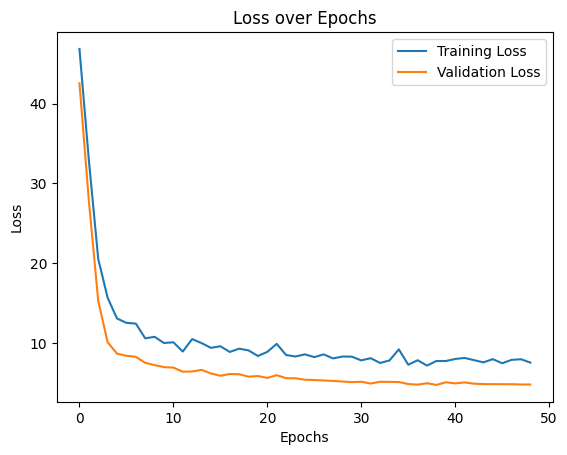

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted total rebounds for the player's next game: 5.68


5.676908

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [6.8],
    'avg_min_last5': [26],
    'opp_avg_reb_allowed': [46.2],
    'player_avg_reb_vs_opp': [7.3],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)


#zach lavine

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 50.0644 - mae: 6.4163 - val_loss: 45.0678 - val_mae: 6.0319 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.3779 - mae: 5.4928 - val_loss: 29.4690 - val_mae: 4.7750 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.7924 - mae: 4.2624 - val_loss: 14.7206 - val_mae: 3.3032 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.4290 - mae: 3.2121 - val_loss: 8.0916 - val_mae: 2.4046 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7596 - mae: 2.7430 - val_loss: 7.3726 - val_mae: 2.2918 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1908 - mae: 2.5255 - val_loss: 7.1964 - val_mae: 2.2714 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2664 - mae: 2.5453 - val_loss: 7.0325 - val_mae: 2.2481 - learning_rate: 0.0010
Ep

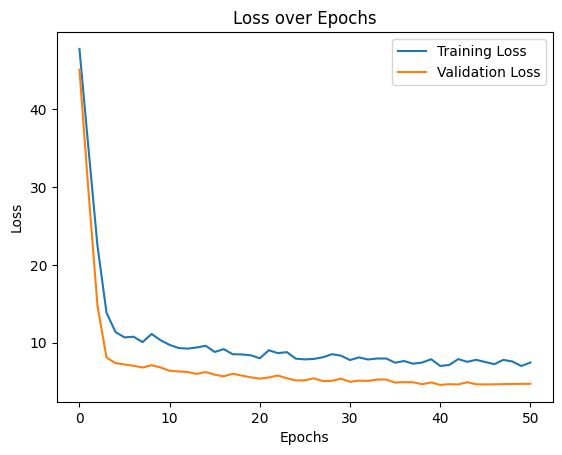

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted total rebounds for the player's next game: 5.07


5.0737596

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_synthetic_data(num_samples=1000, random_seed=42):
    np.random.seed(random_seed)

    # Generate features with some correlations
    avg_min_last5 = np.random.uniform(10, 40, num_samples)
    avg_reb_last5 = (avg_min_last5 / 40) * np.random.uniform(3, 15, num_samples)
    opp_avg_reb_allowed = np.random.uniform(40, 60, num_samples)
    player_avg_reb_vs_opp = np.random.uniform(3, 15, num_samples)
    home_indicator = np.random.randint(0, 2, num_samples)
    back_to_back = np.random.randint(0, 2, num_samples)

    # Generate target variable
    rebounds_next_game = (
        0.6 * avg_reb_last5 +
        0.1 * (avg_min_last5 / 48) * 18 +
        0.3 * player_avg_reb_vs_opp +
        np.random.normal(0, 2, num_samples)
    )
    rebounds_next_game = np.clip(rebounds_next_game, 0, 20)

    # Assemble dataset
    data = pd.DataFrame({
        'avg_reb_last5': avg_reb_last5,
        'avg_min_last5': avg_min_last5,
        'opp_avg_reb_allowed': opp_avg_reb_allowed,
        'player_avg_reb_vs_opp': player_avg_reb_vs_opp,
        'home_indicator': home_indicator,
        'back_to_back': back_to_back,
        'rebounds_next_game': rebounds_next_game
    })
    return data

# Function to preprocess data
def preprocess_data(data):
    X = data.drop('rebounds_next_game', axis=1)
    y = data['rebounds_next_game']

    # Separate numerical and categorical features
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_num_scaled = scaler.transform(X_test[numerical_features])

    # Combine scaled numerical features with categorical features
    X_train_processed = np.hstack((X_train_num_scaled, X_train[categorical_features].values))
    X_test_processed = np.hstack((X_test_num_scaled, X_test[categorical_features].values))

    return X_train_processed, X_test_processed, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R² Score: {r2:.2f}")

    # Visualize results
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
    print(results.head(10))
    return results

# Function to predict for a specific player
def predict_for_player(model, scaler, player_data):
    numerical_features = ['avg_reb_last5', 'avg_min_last5', 'opp_avg_reb_allowed', 'player_avg_reb_vs_opp']
    categorical_features = ['home_indicator', 'back_to_back']

    # Scale numerical features
    player_num_scaled = scaler.transform(player_data[numerical_features])

    # Combine scaled numerical features with categorical features
    player_processed = np.hstack((player_num_scaled, player_data[categorical_features].values))

    # Predict rebounds
    prediction = model.predict(player_processed)
    print(f"Predicted total rebounds for the player's next game: {prediction[0][0]:.2f}")
    return prediction[0][0]

# Main code execution
data = generate_synthetic_data()
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)
model = build_model(X_train.shape[1])

# Add early stopping and learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict for a specific player
player_data = pd.DataFrame({
    'avg_reb_last5': [2.5],
    'avg_min_last5': [32.8],
    'opp_avg_reb_allowed': [46.2],
    'player_avg_reb_vs_opp': [6],
    'home_indicator': [0],
    'back_to_back': [0]
})
predict_for_player(model, scaler, player_data)
